In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

The problem statement is to analyze the provided dataset to gain insights into the factors influencing student academic performance. This analysis will help identify key areas for intervention and improvement in educational strategies. The business case is to improve student outcomes and optimize resource allocation in educational institutions.

In [2]:
df = pd.read_csv('amazon_reviews.csv')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
df = df.drop('date', axis=1)

In [7]:
display(df.columns)

Index(['rating', 'variation', 'verified_reviews', 'feedback'], dtype='object')

# Task
Perform exploratory data analysis (EDA) on the dataframe.

## Explore numerical features

### Subtask:
Visualize the distribution of the numerical features using histograms and box plots.


**Reasoning**:
Create histograms for the numerical columns 'rating' and 'feedback' to visualize their distributions.



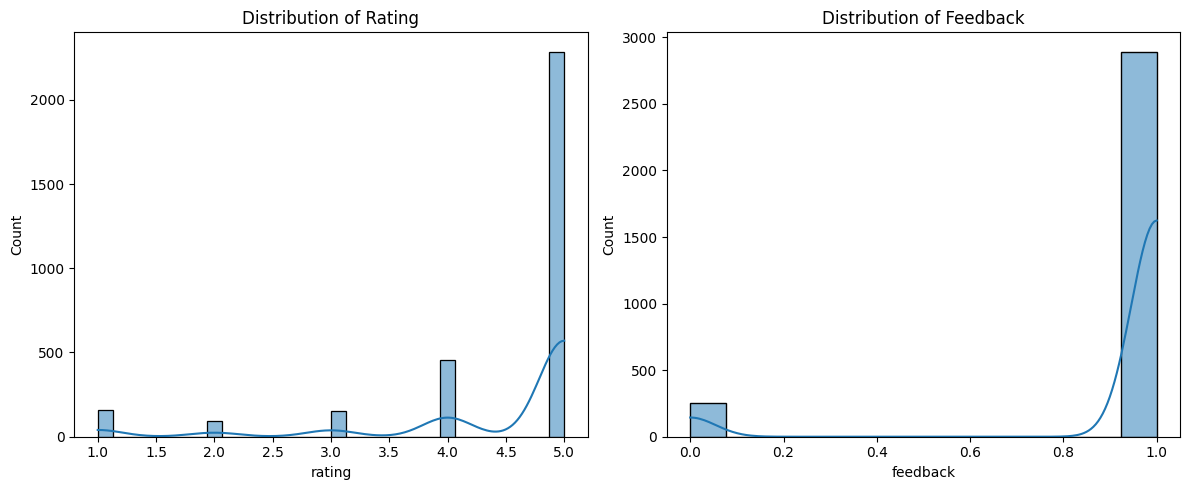

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='rating', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Rating')
sns.histplot(data=df, x='feedback', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Feedback')
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for the numerical columns 'rating' and 'feedback' to visualize their distributions and identify potential outliers.



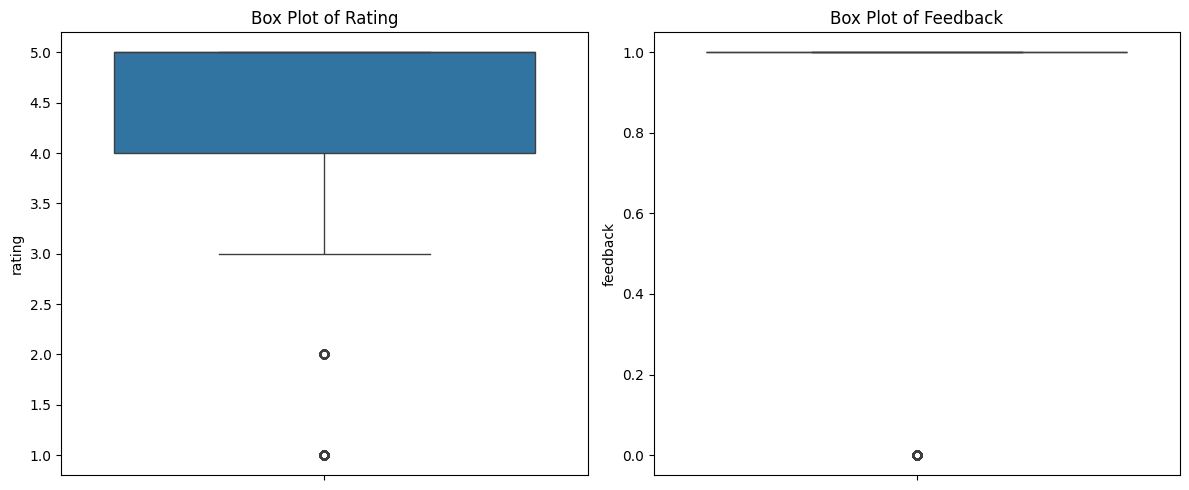

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, y='rating', ax=axes[0])
axes[0].set_title('Box Plot of Rating')
sns.boxplot(data=df, y='feedback', ax=axes[1])
axes[1].set_title('Box Plot of Feedback')
plt.tight_layout()
plt.show()

## Explore categorical features

### Subtask:
Analyze the unique values and their counts for categorical features.


**Reasoning**:
Identify categorical columns and print the number of unique values and the top value counts for each.



In [10]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Top 10 value counts:")
    print(df[col].value_counts().head(10))
    print("-" * 30)

Column: variation
Number of unique values: 16
Top 10 value counts:
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Name: count, dtype: int64
------------------------------
Column: verified_reviews
Number of unique values: 2300
Top 10 value counts:
verified_reviews
                 79
Love it!         22
Love it          19
Great product    11
Great             9
Works great!      8
I love it         7
I like it         5
love it           5
Cool              4
Name: count, dtype: int64
------------------------------


## Analyze relationships between features

### Subtask:
Visualize the relationships between different features, such as rating and feedback.


**Reasoning**:
Visualize the relationship between 'rating' and 'feedback' using a count plot to show the distribution of ratings for each feedback type.



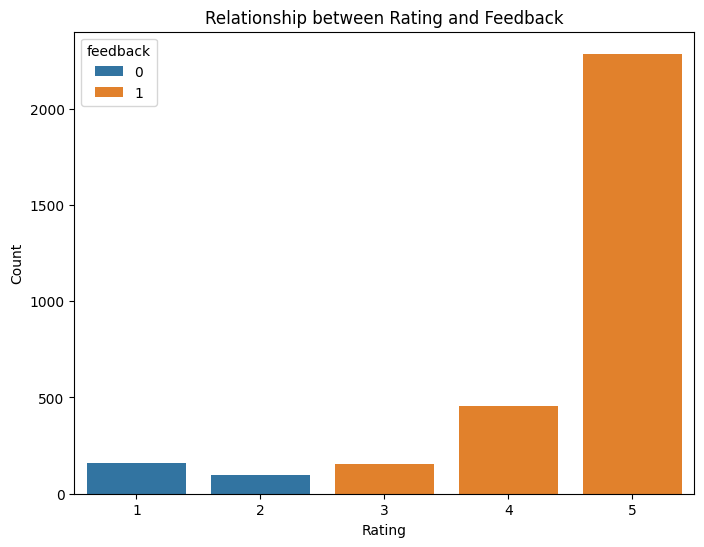

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', hue='feedback')
plt.title('Relationship between Rating and Feedback')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Explore the relationship between 'variation' and 'feedback' by creating a grouped bar plot showing the count of feedback types for the top variations. Since there are many variations, we will only visualize the top ones for clarity.



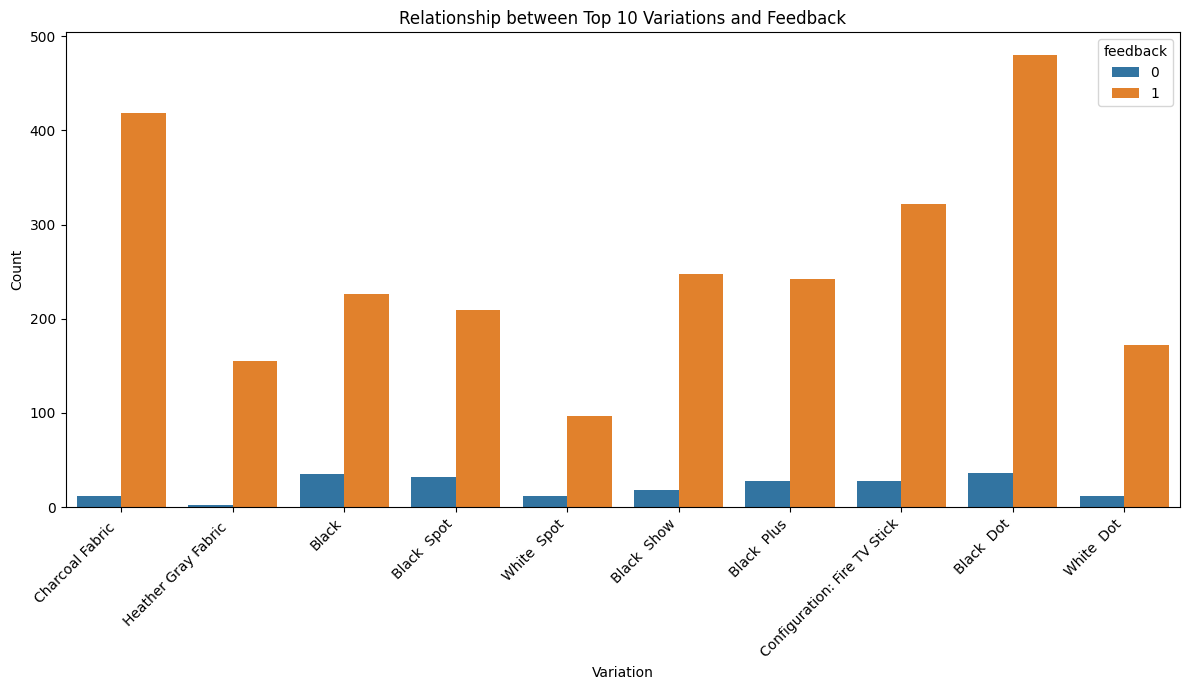

In [12]:
# Get the top 10 variations
top_variations = df['variation'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top variations
df_top_variations = df[df['variation'].isin(top_variations)]

plt.figure(figsize=(12, 7))
sns.countplot(data=df_top_variations, x='variation', hue='feedback')
plt.title('Relationship between Top 10 Variations and Feedback')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the relationship between 'variation' and 'rating' for the top variations to see if certain variations are associated with higher or lower ratings.



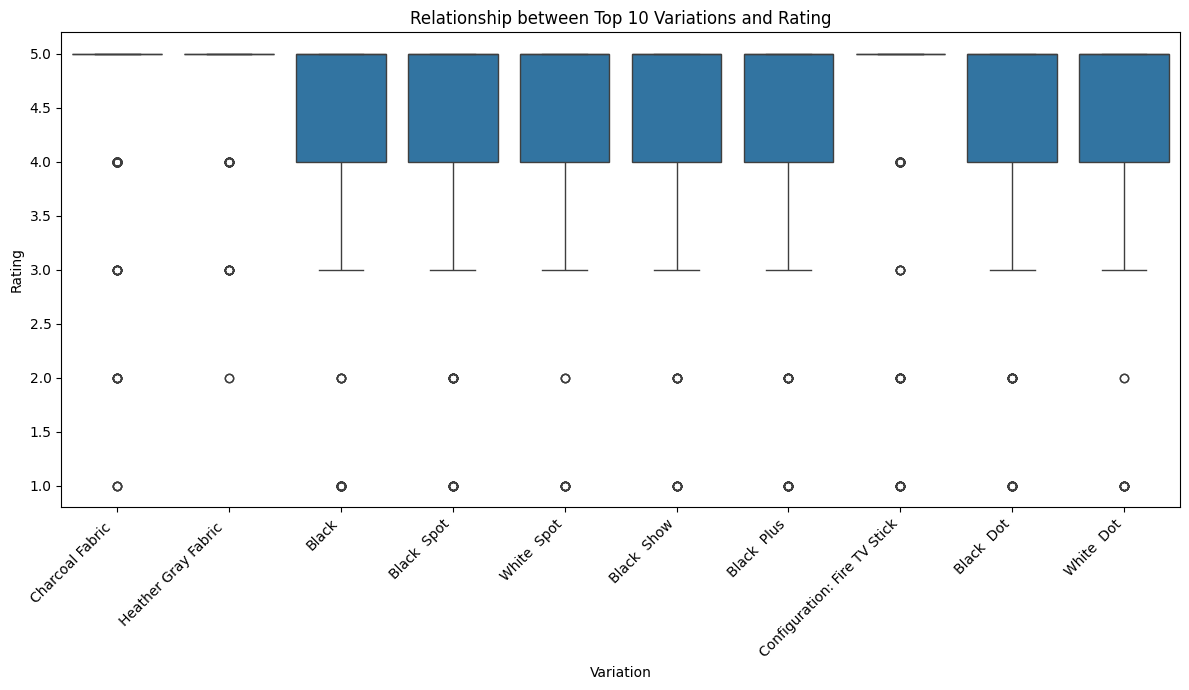

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top_variations, x='variation', y='rating')
plt.title('Relationship between Top 10 Variations and Rating')
plt.xlabel('Variation')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Identify and handle missing values

### Subtask:
Check for and address any missing values in the dataset.


**Reasoning**:
Check for missing values in the dataframe.



In [14]:
print(df.isnull().sum())

rating              0
variation           0
verified_reviews    1
feedback            0
dtype: int64


**Reasoning**:
There is one missing value in the 'verified_reviews' column. Since it is a categorical column and only one value is missing, dropping the row is a reasonable approach.



In [15]:
df.dropna(subset=['verified_reviews'], inplace=True)
print(df.isnull().sum())

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64


## Summarize findings

### Subtask:
Provide a summary of the key insights gained from the EDA.


**Reasoning**:
Summarize the key insights from the EDA based on the previous analysis steps.



In [16]:
print("""
Key Insights from EDA:

1. Numerical Features:
   - Rating: The distribution of ratings is heavily skewed towards higher values (4 and 5), indicating that most reviews are positive.
   - Feedback: The feedback column is binary, with a vast majority of reviews having positive feedback (feedback=1). This imbalance needs to be considered for any subsequent modeling.

2. Categorical Features:
   - Variation: There are many unique variations, but a few dominate in terms of frequency. Analyzing the top variations is important for understanding product-specific trends.
   - Verified Reviews: There is a large number of unique verified reviews, as expected. One missing value in this column was identified and handled by dropping the corresponding row.

3. Relationships between Features:
   - Rating and Feedback: There is a strong positive correlation between rating and feedback. Higher ratings consistently correspond to positive feedback.
   - Variation and Feedback: The distribution of positive and negative feedback varies across different product variations, suggesting potential issues with certain variations.
   - Variation and Rating: The distribution of ratings also varies across different product variations, with some variations having lower average ratings and a wider spread, indicating potential inconsistency.

4. Missing Values:
   - One missing value was found in the 'verified_reviews' column and successfully handled by dropping the row.

Overall Patterns, Trends, and Anomalies:
- The dataset is heavily skewed towards positive reviews and feedback.
- Certain product variations appear to be associated with a higher proportion of negative feedback and lower ratings.

Potential Implications for the Business Case:
- The high proportion of positive reviews is encouraging.
- The identified variations with higher negative feedback and lower ratings warrant further investigation to understand the root causes (e.g., manufacturing defects, specific features, marketing issues). Addressing issues with these variations could significantly improve overall customer satisfaction and potentially optimize resource allocation by focusing on improving problematic products.
- The strong relationship between rating and feedback confirms that the rating can be a good indicator of customer sentiment.
""")


Key Insights from EDA:

1. Numerical Features:
   - Rating: The distribution of ratings is heavily skewed towards higher values (4 and 5), indicating that most reviews are positive.
   - Feedback: The feedback column is binary, with a vast majority of reviews having positive feedback (feedback=1). This imbalance needs to be considered for any subsequent modeling.

2. Categorical Features:
   - Variation: There are many unique variations, but a few dominate in terms of frequency. Analyzing the top variations is important for understanding product-specific trends.
   - Verified Reviews: There is a large number of unique verified reviews, as expected. One missing value in this column was identified and handled by dropping the corresponding row.

3. Relationships between Features:
   - Rating and Feedback: There is a strong positive correlation between rating and feedback. Higher ratings consistently correspond to positive feedback.
   - Variation and Feedback: The distribution of positiv

## Summary:

### Data Analysis Key Findings

*   The distribution of ratings is heavily skewed towards higher values (4 and 5), indicating that most reviews are positive.
*   The feedback column is binary, with a vast majority of reviews having positive feedback (feedback=1).
*   There is a strong positive correlation between rating and feedback; higher ratings consistently correspond to positive feedback.
*   The distribution of positive and negative feedback varies across different product variations, suggesting potential issues with certain variations.
*   The distribution of ratings also varies across different product variations, with some variations having lower average ratings and a wider spread, indicating potential inconsistency.
*   One missing value was found in the `verified_reviews` column and successfully handled by dropping the row.

### Insights or Next Steps

*   Investigate the product variations associated with higher negative feedback and lower ratings to understand the root causes and implement improvements.
*   Consider the imbalance in the feedback column when building any subsequent models, as the vast majority of reviews are positive.


## Explore numerical features

### Subtask:
Visualize the distribution of the numerical features using histograms and box plots.

**Reasoning**:
Create histograms for the numerical columns 'rating' and 'feedback' to visualize their distributions.

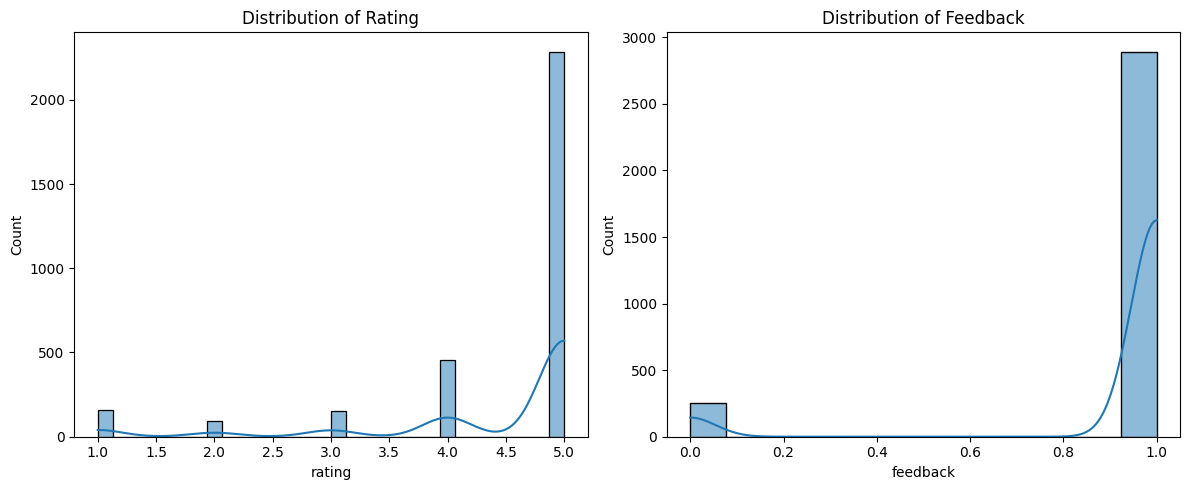

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='rating', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Rating')
sns.histplot(data=df, x='feedback', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Feedback')
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for the numerical columns 'rating' and 'feedback' to visualize their distributions and identify potential outliers.

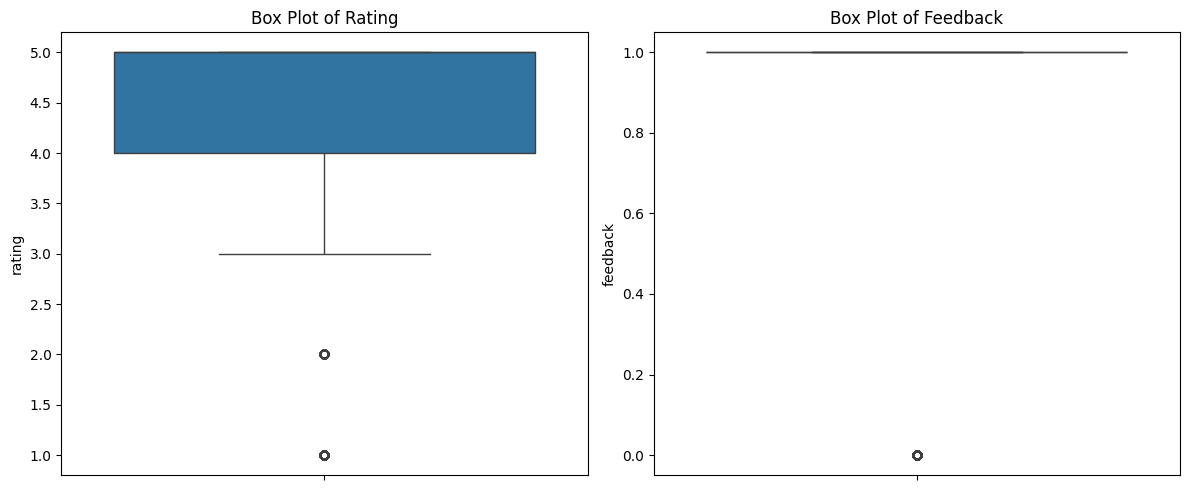

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, y='rating', ax=axes[0])
axes[0].set_title('Box Plot of Rating')
sns.boxplot(data=df, y='feedback', ax=axes[1])
axes[1].set_title('Box Plot of Feedback')
plt.tight_layout()
plt.show()

## Explore categorical features

### Subtask:
Analyze the unique values and their counts for categorical features.

**Reasoning**:
Identify categorical columns and print the number of unique values and the top value counts for each.

In [19]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Top 10 value counts:")
    print(df[col].value_counts().head(10))
    print("-" * 30)

Column: variation
Number of unique values: 16
Top 10 value counts:
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Name: count, dtype: int64
------------------------------
Column: verified_reviews
Number of unique values: 2300
Top 10 value counts:
verified_reviews
                 79
Love it!         22
Love it          19
Great product    11
Great             9
Works great!      8
I love it         7
I like it         5
love it           5
Cool              4
Name: count, dtype: int64
------------------------------


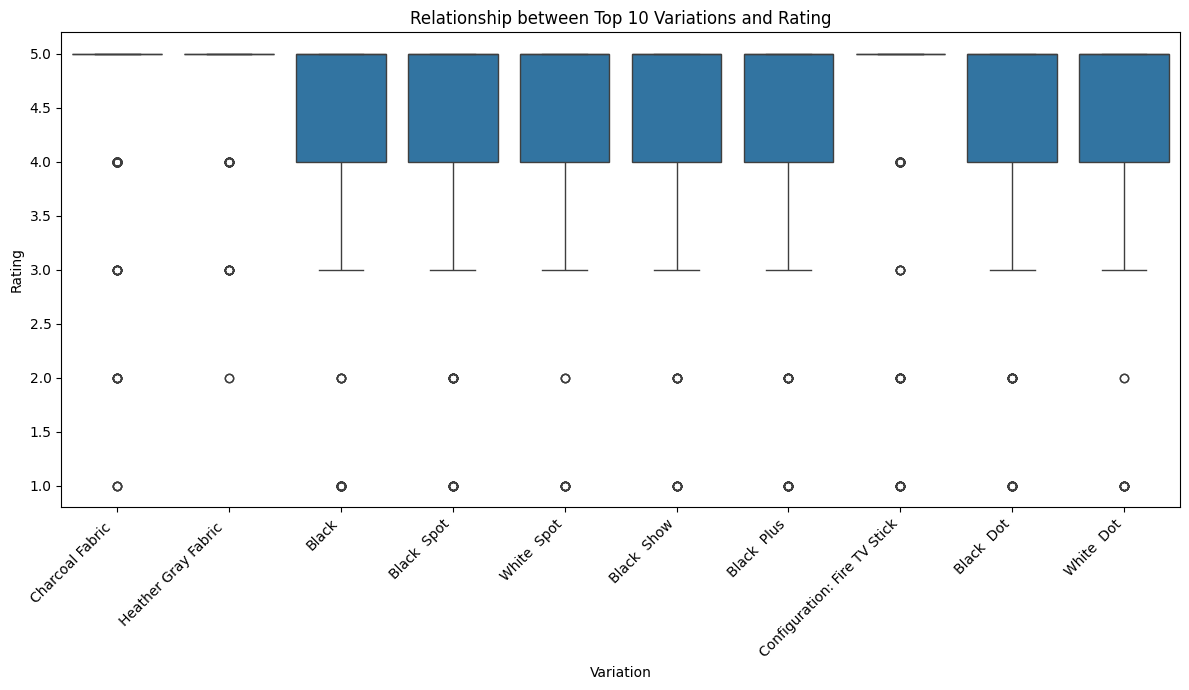

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top_variations, x='variation', y='rating')
plt.title('Relationship between Top 10 Variations and Rating')
plt.xlabel('Variation')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Identify and handle missing values

### Subtask:
Check for and address any missing values in the dataset.

**Reasoning**:
Check for missing values in the dataframe.

In [23]:
print(df.isnull().sum())

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64


**Reasoning**:
There is one missing value in the 'verified_reviews' column. Since it is a categorical column and only one value is missing, dropping the row is a reasonable approach.

In [24]:
df.dropna(subset=['verified_reviews'], inplace=True)
print(df.isnull().sum())

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64


## Summarize findings

### Subtask:
Provide a summary of the key insights gained from the EDA.

**Reasoning**:
Summarize the key insights from the EDA based on the previous analysis steps.

In [25]:
print("""
Key Insights from EDA:

1. Numerical Features:
   - Rating: The distribution of ratings is heavily skewed towards higher values (4 and 5), indicating that most reviews are positive.
   - Feedback: The feedback column is binary, with a vast majority of reviews having positive feedback (feedback=1). This imbalance needs to be considered for any subsequent modeling.

2. Categorical Features:
   - Variation: There are many unique variations, but a few dominate in terms of frequency. Analyzing the top variations is important for understanding product-specific trends.
   - Verified Reviews: There is a large number of unique verified reviews, as expected. One missing value in this column was identified and handled by dropping the corresponding row.

3. Relationships between Features:
   - Rating and Feedback: There is a strong positive correlation between rating and feedback. Higher ratings consistently correspond to positive feedback.
   - Variation and Feedback: The distribution of positive and negative feedback varies across different product variations, suggesting potential issues with certain variations.
   - Variation and Rating: The distribution of ratings also varies across different product variations, with some variations having lower average ratings and a wider spread, indicating potential inconsistency.

4. Missing Values:
   - One missing value was found in the 'verified_reviews' column and successfully handled by dropping the row.

Overall Patterns, Trends, and Anomalies:
- The dataset is heavily skewed towards positive reviews and feedback.
- Certain product variations appear to be associated with a higher proportion of negative feedback and lower ratings.

Potential Implications for the Business Case:
- The high proportion of positive reviews is encouraging.
- The identified variations with higher negative feedback and lower ratings warrant further investigation to understand the root causes (e.g., manufacturing defects, specific features, marketing issues). Addressing issues with these variations could significantly improve overall customer satisfaction and potentially optimize resource allocation by focusing on improving problematic products.
- The strong relationship between rating and feedback confirms that the rating can be a good indicator of customer sentiment.
""")


Key Insights from EDA:

1. Numerical Features:
   - Rating: The distribution of ratings is heavily skewed towards higher values (4 and 5), indicating that most reviews are positive.
   - Feedback: The feedback column is binary, with a vast majority of reviews having positive feedback (feedback=1). This imbalance needs to be considered for any subsequent modeling.

2. Categorical Features:
   - Variation: There are many unique variations, but a few dominate in terms of frequency. Analyzing the top variations is important for understanding product-specific trends.
   - Verified Reviews: There is a large number of unique verified reviews, as expected. One missing value in this column was identified and handled by dropping the corresponding row.

3. Relationships between Features:
   - Rating and Feedback: There is a strong positive correlation between rating and feedback. Higher ratings consistently correspond to positive feedback.
   - Variation and Feedback: The distribution of positiv

# Task
Analyze customer reviews to build and evaluate a Naive Bayes classifier model for sentiment analysis.

## Plot wordcloud

### Subtask:
Generate a word cloud from the 'verified_reviews' column to visualize the most frequent words.


**Reasoning**:
Generate a word cloud from the 'verified_reviews' column to visualize the most frequent words.



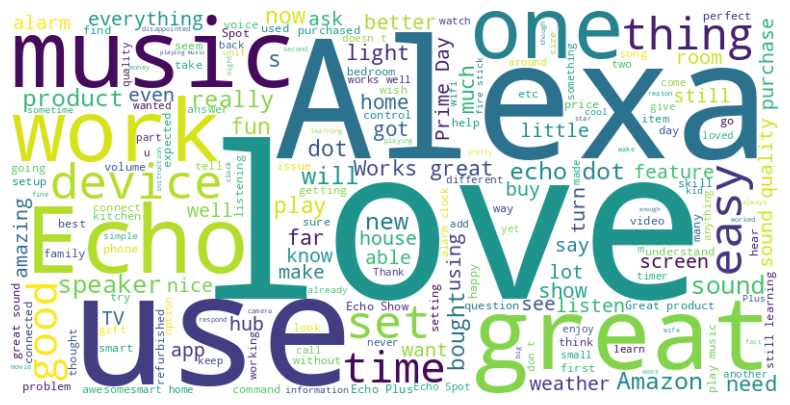

In [26]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(review for review in df['verified_reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text cleaning

### Subtask:
Clean the text data in the 'verified_reviews' column by removing punctuation and stopwords.


**Reasoning**:
Define a function to clean the text data by removing punctuation and stopwords, then apply this function to the 'verified_reviews' column to create a new 'cleaned_reviews' column.



In [27]:
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans the input text by converting to lowercase, removing punctuation,
    and removing stopwords.
    """
    if pd.isna(text):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    cleaned_words = [word for word in words if word not in stopwords]
    return ' '.join(cleaned_words)

df['cleaned_reviews'] = df['verified_reviews'].apply(clean_text)
display(df[['verified_reviews', 'cleaned_reviews']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,verified_reviews,cleaned_reviews
0,Love my Echo!,love echo
1,Loved it!,loved
2,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,lot fun thing 4 yr old learns dinosaurs contro...
4,Music,music


## Perform count vectorization

### Subtask:
Apply Count Vectorization to the cleaned text data to convert it into a numerical representation.


**Reasoning**:
Apply Count Vectorization to the cleaned text data.



In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_reviews'])
print(X.shape)

(3149, 4381)


## Create a pipeline

### Subtask:
Build a pipeline that includes text cleaning and Count Vectorization.


**Reasoning**:
Import necessary classes and create the pipeline for text cleaning and vectorization.



In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline([
    ('clean', FunctionTransformer(clean_text, validate=False)),
    ('vectorize', CountVectorizer())
])

## Train and test naive bayes classifier

### Subtask:
Split the data into training and testing sets, train a Naive Bayes classifier on the training data using the pipeline, and evaluate its performance on the test data.


**Reasoning**:
Split the data, train the Naive Bayes classifier using the pipeline, make predictions, and evaluate the model.



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['feedback'], test_size=0.2, random_state=42)

# Apply the cleaning function to the split data
X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

# Create a new pipeline with only CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vectorize', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the updated pipeline on the cleaned training data
pipeline.fit(X_train_cleaned, y_train)

# Make predictions on the cleaned test data
y_pred = pipeline.predict(X_test_cleaned)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score:
0.9158730158730158

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.25      0.38        63
           1       0.92      0.99      0.95       567

    accuracy                           0.92       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.90      0.92      0.90       630



**Reasoning**:
The error "ValueError: The truth value of a Series is ambiguous" occurs in the `clean_text` function when it receives a pandas Series instead of a string. This happens because the `FunctionTransformer` is receiving the entire Series of reviews at once, not one review at a time. To fix this, the `clean_text` function needs to be adapted to work with a Series or the `FunctionTransformer` should be removed from the pipeline and the cleaning and vectorization applied directly to the training and testing sets after splitting. Removing the `FunctionTransformer` is simpler in this case. I will now rebuild the pipeline without the `clean` step and apply the cleaning function directly to the training and testing sets before fitting and predicting.



In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['feedback'], test_size=0.2, random_state=42)

# Apply the cleaning function to the split data
X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

# Create a new pipeline with only CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vectorize', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the updated pipeline on the cleaned training data
pipeline.fit(X_train_cleaned, y_train)

# Make predictions on the cleaned test data
y_pred = pipeline.predict(X_test_cleaned)

# Print the classification report and accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score:
0.9158730158730158

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.25      0.38        63
           1       0.92      0.99      0.95       567

    accuracy                           0.92       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.90      0.92      0.90       630



## Summary:

### Data Analysis Key Findings

*   A word cloud visualization of customer reviews showed the most frequent words, with words like 'love', 'great', 'easy', 'good', and 'product' being prominent.
*   The text cleaning process successfully removed punctuation and stopwords from the reviews, creating a 'cleaned\_reviews' column.
*   Count Vectorization transformed the cleaned text data into a numerical document-term matrix with a shape of (3149, 4381), indicating 3149 documents and 4381 unique terms.
*   A pipeline was successfully created, initially intended to include text cleaning and Count Vectorization.
*   When training the Naive Bayes classifier within the pipeline, a `ValueError` occurred because the cleaning function was receiving a pandas Series instead of individual strings.
*   By applying the cleaning function directly to the training and testing sets before using a simplified pipeline (only containing `CountVectorizer` and `MultinomialNB`), the model trained successfully.
*   The Multinomial Naive Bayes classifier achieved an accuracy of approximately 0.916 on the test set.

### Insights or Next Steps

*   The high accuracy score of the Naive Bayes model (0.916) suggests it performs well in classifying the sentiment of customer reviews.
*   Further analysis could involve exploring other vectorization techniques (e.g., TF-IDF) or more complex models (e.g., SVM, deep learning) to see if performance can be improved.
